In [1]:
import pandas as pd

In [2]:
condemns = pd.read_csv('https://hds5210-data.s3.amazonaws.com/condemn.txt', low_memory=False)

In [3]:
condemns.columns

Index(['AcctNum', 'PrclErr', 'AddrAdjusted', 'CityBlock', 'Parcel',
       'OwnerCode', 'Handle', 'Parcel9', 'AddrNum', 'AddrSuf', 'StDir',
       'StName', 'StType', 'InspectDate', 'InspectType', 'CondLetterSent',
       'Status', 'OwnerCompany', 'OwnerName', 'OwnerAddr', 'OwnerCity',
       'OwnerState', 'OwnerZIP', 'GeoCityBLockPart', 'Ward00', 'Precinct02',
       'Nbrhd', 'CDADist', 'CDASubDist', 'PoliceDist', 'CensBlock00',
       'AsrNbrhd', 'ImpactCode', 'NLC', 'Parity', 'Inspector', 'Images',
       'FirstDate', 'LastDate', 'UpDateGeo'],
      dtype='object')

In [4]:
condemns.head()

,AcctNum,PrclErr,AddrAdjusted,CityBlock,Parcel,OwnerCode,Handle,Parcel9,AddrNum,AddrSuf,...,CensBlock00,AsrNbrhd,ImpactCode,NLC,Parity,Inspector,Images,FirstDate,LastDate,UpDateGeo
0,1.0,0.0,False,3652.00,341.0,1.0,1.365200e+10,365200341.0,4049,,...,1114.4006,309.0,0.0,123.0,O,NaN,NaN,1987-08-07 00:00:00,2019-01-04 00:00:00,NaN
1,2.0,0.0,False,666.00,80.0,0.0,1.066600e+10,66600080.0,906,,...,1234.2003,248.0,0.0,104.0,E,NaN,NaN,1988-06-28 00:00:00,2019-01-04 00:00:00,NaN
2,3.0,0.0,False,3913.01,120.0,1.0,1.391301e+10,391301120.0,4218,,...,1191.1004,230.0,0.0,210.0,E,NaN,NaN,1990-08-28 00:00:00,2019-01-04 00:00:00,NaN
3,4.0,2.0,False,3744.00,145.0,0.0,1.374400e+10,374400145.0,4145,,...,1111.4000,231.0,0.0,92.0,O,NaN,NaN,1990-06-12 00:00:00,2019-01-04 00:00:00,NaN
4,5.0,0.0,False,1103.00,30.0,0.0,1.110300e+10,110300030.0,1936,,...,1266.5001,318.0,0.0,5.0,E,NaN,NaN,2006-12-21 00:00:00,2019-01-04 00:00:00,NaN


In [5]:
# After you do a groupby, the columns you grouped by become the data frame row index rather than a column.
# You can use .reset_index() to make them columns again!

by_pricinct_status = condemns.groupby(['Precinct02','Status'])['AcctNum'].count().reset_index()

In [6]:
by_pricinct_status

,Precinct02,Status,AcctNum
0,1.0,B,787
1,1.0,L,413
2,1.0,R,6
3,1.0,W,623
4,2.0,B,886
...,...,...,...
62,17.0,B,5
63,17.0,L,1
64,17.0,W,3
65,98.0,W,1


In [7]:
by_pricinct_status.pivot(index='Precinct02', columns='Status', values='AcctNum').fillna(0)

Status,B,L,R,W
Precinct02,,,,
1.0,787.0,413.0,6.0,623.0
2.0,886.0,409.0,7.0,727.0
3.0,698.0,343.0,6.0,667.0
4.0,962.0,469.0,15.0,928.0
5.0,788.0,418.0,11.0,635.0
6.0,857.0,435.0,10.0,603.0
7.0,900.0,454.0,7.0,672.0
8.0,1033.0,453.0,10.0,1134.0
9.0,795.0,354.0,5.0,616.0


In [8]:
import numpy as np
by_precinct = condemns.pivot_table(
    values='AcctNum', 
    index='Precinct02', 
    columns='Status', 
    aggfunc=np.ma.count, 
    fill_value=0)

In [9]:
by_precinct

Status,B,L,R,W
Precinct02,,,,
1.0,787,413,6,623
2.0,886,409,7,727
3.0,698,343,6,667
4.0,962,469,15,928
5.0,788,418,11,635
6.0,857,435,10,603
7.0,900,454,7,672
8.0,1033,453,10,1134
9.0,795,354,5,616


In [10]:
import numpy as np
by_date = condemns.pivot_table(
    values='AcctNum', 
    index='InspectDate', 
    columns='Status', 
    aggfunc=np.ma.count, 
    fill_value=0)

In [11]:
by_date

Status,B,L,R,W
InspectDate,,,,
1901-05-05 00:00:00,0,0,0,1
1904-10-06 00:00:00,1,0,0,0
1905-11-16 00:00:00,0,0,0,1
1906-11-25 00:00:00,1,0,0,0
1907-07-12 00:00:00,0,0,0,1
...,...,...,...,...
2015-02-12 00:00:00,1,0,0,0
2015-02-17 00:00:00,0,1,0,0
2025-07-25 00:00:00,1,0,0,0


<Axes: xlabel='InspectDate'>

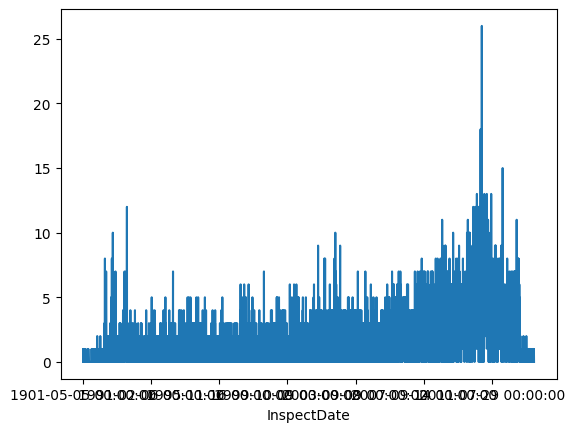

In [12]:
%matplotlib inline
by_date['B'].plot()

In [13]:
condemns['InspectDate'].head()

0    1986-07-10 00:00:00
1    2009-07-23 00:00:00
2    2003-08-06 00:00:00
3    1996-06-17 00:00:00
4    2006-12-20 00:00:00
Name: InspectDate, dtype: object

In [14]:
 condemns['InspectYear'] = condemns['InspectDate'].str[0:4]

In [15]:
per_year = condemns.pivot_table(
    values='AcctNum', 
    index='InspectYear', 
    columns='Status', 
    aggfunc=np.ma.count, 
    fill_value=0)

<Axes: xlabel='InspectYear'>

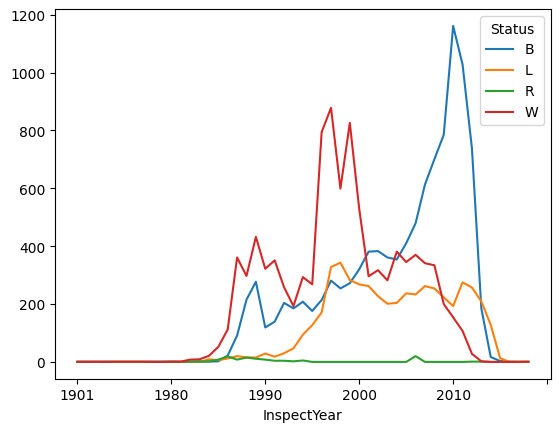

In [16]:
per_year.plot()

In [17]:
per_year.sort_values('InspectYear')

Status,B,L,R,W
InspectYear,,,,
1901,0,0,0,1
1904,1,0,0,0
1905,0,0,0,1
1906,1,0,0,0
1907,0,0,0,1
1908,0,0,0,1
1909,0,0,0,1
1916,0,0,0,1
1958,1,0,0,0
